# Pipeline Motif Damasio

## Cas d'étude

Nous proposons dans la cadre de l'atelier d'explorer l'utilisation du pipeline PyMotifs à travers deux cas d'étude, l'un sur un corpus de très petite taille et un autre sur un corpus plus volumineux afin d'explorer différents usages de la librairie.

- Une étude du style d'Alain Damasio dans la *Horde du Contrevent*.
- Une étude de plusieurs romans de trois auteurs.

Commençons par celui sur la *Horde du Contrevent*.

## Présentation du corpus et constitution

### Résumé général : 

_La Horde du Contrevent_ est un roman de fantasy d'Alain Damasio publié en 2004. Il raconte l'histoire d'une équipe de 22 personnes, chacune dotée d'une compétence unique, qui voyage à travers un monde inhospitalier et venteux pour atteindre l'Extrême-Amont, d'où souffle le vent qui façonne leur monde. Leur mission est de découvrir l'origine de ce vent et de trouver un moyen de l'arrêter, afin de mettre fin aux terribles tempêtes qui ravagent leur monde depuis des siècles. 

Le roman est narré à travers les perspectives de différents membres de l'équipe, chacun avec leur propre voix et leur propre histoire.

Au fil de leur voyage, ils doivent faire face à de nombreux dangers, tant physiques que psychologiques, et apprendre à travailler ensemble malgré leurs différences et leurs conflits internes. La Horde doit également affronter les obstacles posés par les différents étages de la société qui contrôle le monde dans lequel ils vivent.

Le roman aborde des thèmes tels que la quête de sens, la lutte contre l'oppression, le pouvoir de l'amitié et de la solidarité.

### Explication sur le procédé narratif de la _Horde du Contrevent_

_La Horde du Contrevent_ fonctionne selon un procédé de narration polyphonique où chaque personnage développe sa propre voix narrative, identifiée au sein du roman par un système de glyphe en début de paragraphe permettant au lecteur de savoir quel personnage est en train de prendre en charge le récit. Chaque personnage a donc un glyphe particulier, ainsi qu'un rôle déterminé dans la Horde : 

- Ω pour Golgoth, Traceur.
- π pour Pietro Della Rocca, Prince.
- ) pour Sov Sevcenko Strochnis, Scribe.
- Etc.

### Constitution du corpus : 

Nous avons pratiqué un découpage de l'ensemble du livre _La Horde du Contrevent_ en isolant chaque voix narrative correspondant aux 22 personnages du livre. 

Il est intéressant de noter d'entrée que sur les 22 personnages présentant des glyphes au début du roman, seuls 20 ont en charge une voix narrative propre dans le récit. Nous disposons donc de 20 fichiers .txt comprenant, dans l'ordre de déroulement du récit, chacune des voix des personnages. 

En plus de ce corpus correspondant aux récits des différents personnages, nous avons également isolé l'ensemble des dialogues pour constituer un deuxième corpus. Dans celui-ci, nous avons retiré les quelques incises dialogiques que Damasio a laissé ("dit-elle", "beugla x", etc.). Soulignons au passage que souvent (mais pas systématiquement), ces incises sont entre parenthèses, semblables à des didascalies théâtrales.

__N.B.__ : Dans la mesure où chaque voix narrative est, comme nous l'avons vu, identifiée par un glyphe permettant de comprendre à quelle focalisation nous passons, nous avons retiré les glyphes des différents corpus pour éviter que les motifs de chaque personnage soient influencé par ce glyphe qui leur est propre.

### Pistes d'analyse : 

- À quel point les motifs stylistiques sont distinctifs pour chaque locuteur ? Comment le rôle spécifique de chaque personnage dans le roman peut être également approché à partir du style de sa narration ?
- À quel point le projet d'Alain Damasio de créer un roman polyphonique à 22 voix parvient-il à remplir son objectif ? Est-ce que les personnages présentent, au niveau textométrique, une réelle distinction ?
- Quels sont les personnages les plus proches les uns des autres au niveau narratif ? Quels sont les personnages présentant le style le plus distinctif ?
- Le roman ne présentant quasiment pas de signes dialogiques permettant d'identifier les locuteurs au sein des dialogues - cette identification reposant en partie sur le style propre du dialogue et l'aptitude du lecteur à faire le lien entre la voix narrative et le style orale du dialogue -, est-il possible d'entraîner, à partir des arcs narratifs, un modèle de prédiction identifiant les locuteurs ?
  - À partir de ce modèle prédictif, quelles sont les motifs les plus distinctifs de chaque personnage ?

## Motifs pipeline

Ce manuel montre comment utiliser le pipeline Motif. Le pipeline Motif transforme un corpus en caractéristiques basées sur des motifs, ou d'autres jetons UDPipe, tels que POS, lemma, etc. Il se compose de 4 étapes :
- la tokenisation UDPipe du corpus
- prétraitement des tokens avec transformation en n-grammes
- featurisation des n-grammes, par exemple : TFIDF ou TF
- visualisation, par exemple : analyse PCA, diagrammes de distribution, analyse de spécificité.

Ensuite, vous pouvez revenir aux textes à différentes échelles :

- Niveau du corpus.
- Niveau du document.
- Niveau du motif.

## Variables d'entrée

- `corpus_dir` : Si vous exécutez ce notebook pour la première fois, vous devez passer le corpus_dir comme paramètre afin d'annoter le corpus et de créer les
tokens. La fonction créera automatiquement un répertoire avec le corpus annoté.
- Sinon, donnez le répertoire `tokens_dir` (résultat de l'annotation du pipeline et de la transformation en motifs) comme argument.
- `token_type` : Définit le type de token qui nous intéresse, `AVAILABLE_TOKEN_TYPES = [« text », « lemma », « pos », « motif »]`.
- `feature` : Définit la caractéristique sur laquelle effectuer l'analyse PCA (voir https://en.wikipedia.org/wiki/SMART_Information_Retrieval_System : `bnc`, `nfc`, `atu`, `lpb`).
- `n` : longueur du n-gramme de la séquence.

N.B. :__ par défaut, le paquet contient un corpus de test disponible à ce chemin : `PKG_DATA_PATH.joinpath('corpus_test')`. 

In [5]:
from motifs.config import PKG_DATA_PATH

# Define the path of the corpus
#corpus_dir = './corpus/corpus_personnages/'
tokens_dir = './20240929_100442_pipeline/tokens'

# Ex : tokens_dir = "../data/canon/tokens_canon"
# Ex : corpus_dir = None

# Define the token type: AVAILABLE_TOKEN_TYPES = ["text", "lemma", "pos", "motif"]
token_type = "motif"

# Define the feature on which to perform PCA analysis
feature = {"name": "tfidf", "params": {"normalize": True, "smartirs": "nfc"}}
# Please check gensim doc for the parameters definition. SMARTIRS
# corresponds to the standard notation available at https://en.wikipedia.org/wiki/SMART_Information_Retrieval_System

# n-gram length
n = 5

### Remarque sur le choix de la longueur de la séquence à l'étude

Le choix du ngram est une des limitations claires de la librairie tout en étant également un avantage pour les calculs statistiques. 

De fait, le choix de la longueur de la séquence à l'étude impacte l'ensemble des analyses qui suivent et nous devrons nous tenir à ce choix tout au long du pipeline. 

Cela étant dit, avec l'expérience, on se rend compte également que faire varier la longueur des séquences n'équivaut pas forcément à des résultats très différents. Souvent, on retrouve les mêmes motifs lorsqu'on fait varier la longueur du ngram, avec un token de plus ou de moins. Ce qui est plus intéressant, c'est ainsi de voir qu'une séquence de 5 peut apparaître en réalité comme une séquence qui serait plutôt de 6 ou 7 lorsque l'on revient aux textes pour interpréter. 

### Remarque sur le corpus et la constitution du corpus

Il faut bien comprendre qu'ici, notre corpus n'est pas constitué d'un texte qui serait la *Horde du Contrevent*, mais est bien plutôt à comprendre comme un ensemble de 20 textes correspondants aux voix narratives de chacun des personnages du récit.

## Import librairies

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

from motifs.pipeline import Pipeline
from motifs.plots import plot_motif_histogram, plot_tf_idf
from motifs.pca import pca_transform
import time

## Create pipeline object and perform annotation

La classe `Pipeline` effectue l'annotation sur la base des fichiers bruts (.txt) du répertoire du corpus et transforme le corpus dans le `token_type` choisi. La fonction help() donne la documentation de la fonction et de ses paramètres.

In [7]:
help(Pipeline)

Help on class Pipeline in module motifs.pipeline:

class Pipeline(builtins.object)
 |  Pipeline(token_type: str, tokens_dir: Optional[str] = None, corpus_dir: Optional[str] = None, docs: Optional[List] = None, save: bool = True, output_dir: Optional[str] = None, **kwargs)
 |  
 |  The Motif pipeline transforms a corpus to motif-based features, or other
 |  UDPipe tokens, such as POS, lemma, etc. It consists of 4 steps:
 |  - UDPipe tokenization of the corpus
 |  - tokens preprocessing with n-gram transformation
 |  - n-grams featurization, for example: TFIDF or TF
 |  - visualization, for example: PCA analysis, distributional plots,
 |  specificity analysis.
 |  
 |  :param token_type: type of the token to use for the analysis. Should be
 |  one of ["text", "lemma", "pos", "motif"]
 |  :param feature: Feature's configuration.
 |  :param tokens_dir: The folder where the tokens for each text is located.
 |  The tokens should be stored in a csv file obtained from `transform_corpus`
 |  of

In [47]:
pipeline = Pipeline(token_type, tokens_dir, save=False)

[PyMotifs-Logger:pipeline.py:96] - [48695] - 2024-09-29 15:20:31 - DEBUG - Loading tokens from directory: ./20240929_100442_pipeline/tokens...
[PyMotifs-Logger:pipeline.py:99] - [48695] - 2024-09-29 15:20:31 - DEBUG - Done in 0.18 secs.


N.B. : Si nous avions voulu annoter notre corpus de documents: 

In [ ]:
# Define the path of the corpus
#corpus_dir = './corpus/corpus_personnages/'
#tokens_dir = None

# Define the token type: AVAILABLE_TOKEN_TYPES = ["text", "lemma", "pos", "motif"]
#token_type = "motif"

# Define the feature on which to perform PCA analysis
#feature = {"name": "tfidf", "params": {"normalize": True, "smartirs": "nfc"}}

# n-gram length
#n = 5

#pipeline = Pipeline(token_type, corpus_dir, tokens_dir, save=True)

## Transform tokens to n-grams

La fonction `transform_to_ngrams` transforme le corpus annoté en motifs de longueur n-grams. Le paramètre est la longueur de la séquence souhaitée (ngrams).

In [49]:
t1 = time.time()
# Transform to n_grams
pipeline.transform_to_ngrams(n)
t2 = time.time()
print(f"Execution time: {t2 - t1:.4f} secs")

[PyMotifs-Logger:features.py:49] - [49706] - 2024-09-29 15:20:53 - DEBUG - Steps to go 19
[PyMotifs-Logger:features.py:49] - [49717] - 2024-09-29 15:20:53 - DEBUG - Steps to go 20
[PyMotifs-Logger:features.py:49] - [49719] - 2024-09-29 15:20:53 - DEBUG - Steps to go 17
[PyMotifs-Logger:features.py:49] - [49712] - 2024-09-29 15:20:53 - DEBUG - Steps to go 18
[PyMotifs-Logger:features.py:49] - [49716] - 2024-09-29 15:20:53 - DEBUG - Steps to go 16
[PyMotifs-Logger:features.py:49] - [49721] - 2024-09-29 15:20:53 - DEBUG - Steps to go 15
[PyMotifs-Logger:features.py:49] - [49706] - 2024-09-29 15:20:53 - DEBUG - Steps to go 14
[PyMotifs-Logger:features.py:49] - [49710] - 2024-09-29 15:20:53 - DEBUG - Steps to go 13
[PyMotifs-Logger:features.py:49] - [49722] - 2024-09-29 15:20:53 - DEBUG - Steps to go 12
[PyMotifs-Logger:features.py:49] - [49715] - 2024-09-29 15:20:53 - DEBUG - Steps to go 11
[PyMotifs-Logger:features.py:49] - [49716] - 2024-09-29 15:20:53 - DEBUG - Steps to go 10
[PyMotifs-

Execution time: 1.7826 secs


Regardons à quoi ressemble maintenant notre jeu de données transformé en motifs. Pour cela, il suffit d'appeler l'objet pipeline.ngrams.

In [65]:
pipeline.ngrams.head(20)

word                            text                      token  \
2384        J'       J' attends la réaction de           je PRES le NC de   
2385   attends  attends la réaction de Golgoth        PRES le NC de PROPN   
2386        la        la réaction de Golgoth .           le NC de PROPN .   
2387  réaction        réaction de Golgoth . Il           NC de PROPN . il   
2388        de              de Golgoth . Il n'          de PROPN . il ADV   
2389   Golgoth               Golgoth . Il n' a       PROPN . il ADV avoir   
2390         .                   . Il n' a pas         . il ADV avoir pas   
2391        Il              Il n' a pas encore    il ADV avoir pas encore   
2392        n'          n' a pas encore ouvert  ADV avoir pas encore PPAS   
2393         a          a pas encore ouvert la   avoir pas encore PPAS le   
2394       pas     pas encore ouvert la bouche   pas encore PPAS le NCCOR   
2395    encore       encore ouvert la bouche .     encore PPAS le NCCOR .   
2396    ouvert         ouvert la bouche . Tout       PPAS le NCCOR . tout   
2397        la             la bouche . Tout en         le NCCOR . tout en   
2398    bouche            bouche . Tout en lui        NCCOR . tout en lui   
2399         .          . Tout en lui témoigne         . tout en lui PRES   
2400      Tout         Tout en lui témoigne de        tout en lui PRES de   
2401        en          en lui témoigne de son         en lui PRES de son   
2402       lui      lui témoigne de son dégoût      lui PRES de son NCABS   
2403  témoigne     témoigne de son dégoût pour     PRES de son NCABS pour   

         doc  
2384  Pietro  
2385  Pietro  
2386  Pietro  
2387  Pietro  
2388  Pietro  
2389  Pietro  
2390  Pietro  
2391  Pietro  
2392  Pietro  
2393  Pietro  
2394  Pietro  
2395  Pietro  
2396  Pietro  
2397  Pietro  
2398  Pietro  
2399  Pietro  
2400  Pietro  
2401  Pietro  
2402  Pietro  
2403  Pietro

## Simple statistics

### Number of tokens per document

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Callirhoe'),
  Text(1, 0, 'Barbak'),
  Text(2, 0, 'Pietro'),
  Text(3, 0, 'Erg_Machaon'),
  Text(4, 0, 'Horst_Karst'),
  Text(5, 0, 'Talweg'),
  Text(6, 0, 'Boscavo_Silamphre'),
  Text(7, 0, 'Golgoth'),
  Text(8, 0, 'Oroshi'),
  Text(9, 0, 'Steppe_Phorehys'),
  Text(10, 0, 'Darbon'),
  Text(11, 0, 'Aoi_Nan'),
  Text(12, 0, 'Alme_Capys'),
  Text(13, 0, 'Sov_Strochnis'),
  Text(14, 0, 'Coriolis'),
  Text(15, 0, 'Larco_Scarsa'),
  Text(16, 0, 'Arval_Redhamaj'),
  Text(17, 0, 'Caracole'),
  Text(18, 0, 'Tourse'),
  Text(19, 0, 'Firost')])

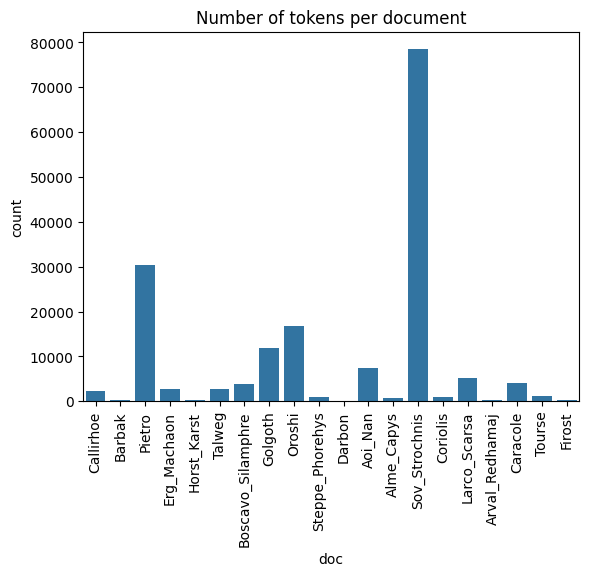

In [50]:
## Number of tokens per document
sns.countplot(pipeline.ngrams, x="doc")
plt.title("Number of tokens per document")
plt.xticks(rotation=90)

Regardons le nombre de mots par personnage.

In [51]:
count_tok = pipeline.ngrams.value_counts('doc')
count_tok

doc
Sov_Strochnis        78474
Pietro               30427
Oroshi               16818
Golgoth              11786
Aoi_Nan               7449
Larco_Scarsa          5218
Caracole              3977
Boscavo_Silamphre     3864
Talweg                2678
Erg_Machaon           2624
Callirhoe             2211
Tourse                1116
Steppe_Phorehys        908
Coriolis               891
Alme_Capys             802
Horst_Karst            346
Firost                 282
Arval_Redhamaj         238
Barbak                 173
Darbon                 135
Name: count, dtype: int64

On remarque ici d'emblée le problème majeur de ce corpus (et peut-être de ce projet), à savoir la différence de volume entre les différentes voix narratives. Sov Strochnis, personnage qui incarne le scribe en charge de raconter l'histoire de l'ensemble de la horde, a logiquement une place prépondérante dans ce corpus.

Par rapport à nos problématiques d'analyse, ce simple dénombrement et cette visualisation permettent déjà de répondre à l'une de nos problématiques, "à quel point le projet d'Alain Damasio de créer un roman polyphonique à 22 voix parvient-il à remplir son objectif ?", on pourrait déjà répondre que les 22 voix sont en réalité, au niveau statistique, très inégalement représentées, le personnage de Sov prenant en charge près de la moitié des voix narratives et les quatre premiers personnages couvrant 80% de la narration.

Cette simple constatation statistique ne doit cependant pas nous faire croire qu'un personnage qui ne prend que peu en charge le récit ne serait pas un personnage central du récit. On peut souligner, contre-intuitivement, la place peu présente dans ce dénombrement de certains personnages qui apparaissent pourtant majeurs au sein du récit, en particulier le troubadour Caracole qui, s'il est un personnage central du récit, n'en n'a pourtant pas moins un des volumes narratifs les plus faibles (7ème).

In [52]:
pipeline.ngrams.value_counts('doc', normalize=True) * 100

doc
Sov_Strochnis        46.048223
Pietro               17.854439
Oroshi                9.868734
Golgoth               6.915977
Aoi_Nan               4.371043
Larco_Scarsa          3.061901
Caracole              2.333687
Boscavo_Silamphre     2.267379
Talweg                1.571439
Erg_Machaon           1.539752
Callirhoe             1.297406
Tourse                0.654864
Steppe_Phorehys       0.532811
Coriolis              0.522835
Alme_Capys            0.470610
Horst_Karst           0.203031
Firost                0.165476
Arval_Redhamaj        0.139657
Barbak                0.101516
Darbon                0.079217
Name: proportion, dtype: float64

Mettons en évidence les différents __problèmes__ qu'une telle disproportion peut produire : 

- Surreprésentation des textes longs à la suite des calculs statistiques. 
- Biais dans les interprétation de ces représentations statistiques.
- Déséquilibre des classes dans les tâches de classification (classification, clustering) entraînant des influences sur le modèle.

__Solutions potentielles :__

- Sous-échantillonnage : Une approche consiste à normaliser la taille des textes en procédant à un sous-échantillonnage des textes longs. C'est ce que l'on appelle en anglais le *downsampling* (échantillonnage à partir du texte ou la classe la plus petite).
- Utilisation de calculs statistiques qui tendent à réduire les différences de longueurs entre les textes (tf-idf pondéré, calcul de spécificités).
- Utilisation de méthodes basées sur des fenêtres de contextes fixes : méthodes basées sur des fenêtres contextuelles fixes (par exemple, n-grammes ou des vecteurs sur des fenêtres de mots de taille fixe). Cela permet de comparer des segments de tailles plus égales, réduisant ainsi l’impact des différences de longueur.
- Approches de pondération par fréquence absolue.
- Utilisation de modèles plus avancés (transformers ou embeddings globaux) : pour éviter les problèmes liés à la longueur des documents et capturer les relations entre mots dans des contextes divers, les modèles de type BERT ou GPT (basés sur des transformers) sont plus robustes. Ces modèles considèrent des représentations contextuelles des mots et des segments, ce qui réduit l'importance des textes longs ou courts puisqu’ils se concentrent sur des relations locales dans un texte.
    - Problème ici : nous ne cherchons pas à capturer les éléments proprement sémantiques, mais plutôt stylistiques.
- Segmenter les textes longs en sous-parties.
- Etc.

Dans notre cas, pour l'instant, optons pour une sélection arbitraire du nombre de voix fondée sur notre connaissance du roman, une analyse ne pouvant écarter un personnage comme Caracole des analyses au regard de son importance dans le roman et dans le style qu'il développe. Nous pourrons revenir sur ce choix plus tard.

In [53]:
pipeline.ngrams = pipeline.ngrams[pipeline.ngrams['doc'].isin(['Sov_Strochnis', 'Pietro', 'Oroshi', 'Golgoth', 'Aoi_Nan', 'Larco_Scarsa', 'Caracole'])]
pipeline.ngrams

word                            text                 token  \
2384          J'       J' attends la réaction de      je PRES le NC de   
2385     attends  attends la réaction de Golgoth   PRES le NC de PROPN   
2386          la        la réaction de Golgoth .      le NC de PROPN .   
2387    réaction        réaction de Golgoth . Il      NC de PROPN . il   
2388          de              de Golgoth . Il n'     de PROPN . il ADV   
...          ...                             ...                   ...   
169014     tiens         tiens : Respire sans en     ADJ : ADV sans en   
169015         :         : Respire sans en avoir   : ADV sans en avoir   
169016   Respire        Respire sans en avoir l'  ADV sans en avoir le   
169017      sans            sans en avoir l' air   sans en avoir le NC   
169018        en             en avoir l' air ...    en avoir le NC ...   

             doc  
2384      Pietro  
2385      Pietro  
2386      Pietro  
2387      Pietro  
2388      Pietro  
...          ...  
169014  Caracole  
169015  Caracole  
169016  Caracole  
169017  Caracole  
169018  Caracole  

[154149 rows x 4 columns]

Intéressons-nous maintenant à la fréquence d'apparition de motifs pour chaque voix narrative.

In [54]:
help(plot_motif_histogram)

Help on function plot_motif_histogram in module motifs.plots:

plot_motif_histogram(ngrams: pandas.core.frame.DataFrame, stat: str = 'count', n_tokens: int = 15, plot_type: str = 'group')
    Create a histogram plot of the n-grams based on different statistics such
    as "count" (default), "proportion", or "percent". The n_tokens
    corresponds to the maximum number of tokens to represent on
    the graph.
    
    :param ngrams: DataFrame of ngrams tokens with columns: ["token", "doc"]
    :param stat: One of ["count", "proportion", "percent"]
    :param n_tokens: Max number of tokens to plot
    :param plot_type: "group" or "sep"
    :return:



/opt/anaconda3/envs/pymotifs-formation/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


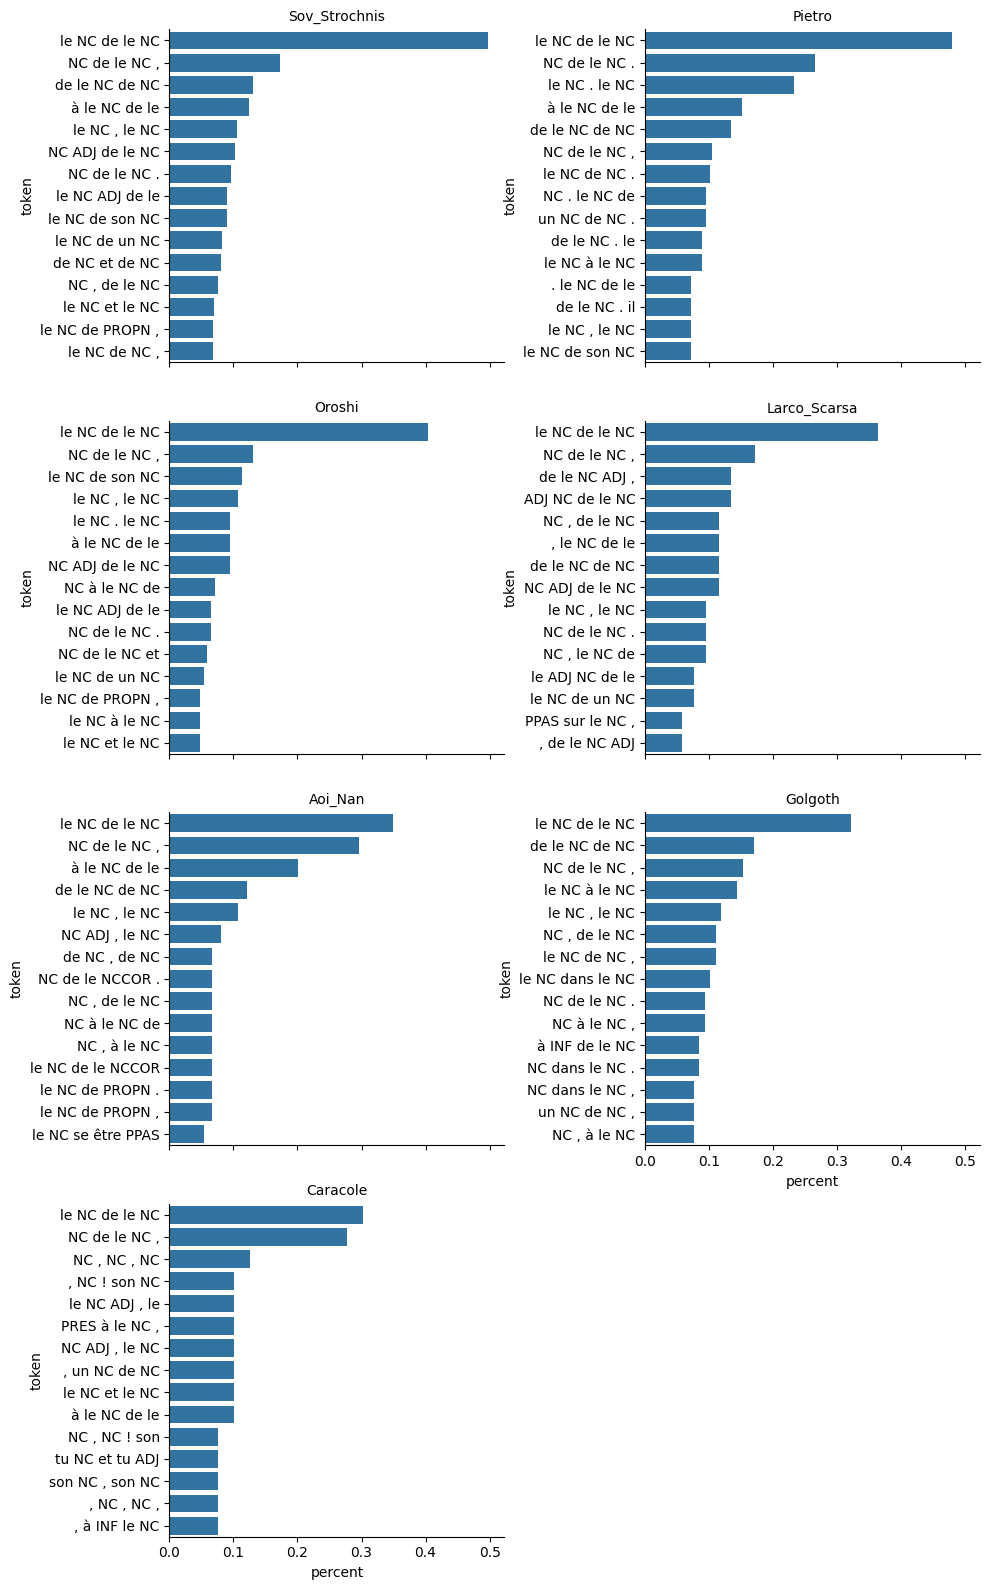

In [55]:
# Plot distribution of tokens separatly
plot_motif_histogram(pipeline.ngrams, stat="percent", n_tokens=15, plot_type="sep")

## Compute features (Tf-idf)

Dans cet exemple, nous utilisons les caractéristiques tf-idf et nous représentons les plus fréquentes. L'idée est ici de distinguer les textes d'un corpus les uns des autres. Plus le score tf-idf est élevé, plus le texte est spécifique au sein du corpus.

### Topo sur le tf-idf

Le TF-IDF, qui signifie "Term Frequency - Inverse Document Frequency", est une méthode utilisée en traitement automatique du langage naturel pour évaluer l'importance d'un mot dans un texte, tout en tenant compte de sa présence dans une collection de documents. C'est une approche fréquemment employée pour mieux comprendre la pertinence des mots dans un ensemble de textes. Il est composé de deux termes : TF et IDF.

- La fréquence du terme, ou TF, mesure à quel point un mot apparaît souvent dans un document donné. Par exemple, si dans un texte de 100 mots, le mot "humanités" apparaît 5 fois, sa fréquence est de 5 %, ou 0,05. Cela montre que ce mot est relativement présent dans ce texte spécifique.

Cependant, pour bien comprendre l'importance d'un mot, il ne suffit pas de savoir combien de fois il apparaît dans un document. Il faut aussi tenir compte de la rareté ou de la fréquence de ce mot dans un corpus plus large, c’est-à-dire l'ensemble des documents étudiés. C’est là qu’intervient l'IDF, la fréquence inverse des documents.

- L'IDF ajuste la fréquence du mot en prenant en compte combien de documents, dans l’ensemble du corpus, contiennent ce mot. Par exemple, un mot très commun, comme "le" ou "est", apparaît dans presque tous les documents et n'apporte pas d'informations spécifiques. En revanche, un mot plus rare, comme "sociolecte" dans des textes de linguistique, sera jugé plus pertinent s’il est peu présent ailleurs. L'IDF est calculée à l’aide d'une formule mathématique qui prend en compte le nombre total de documents et le nombre de documents où le mot apparaît. Plus un mot est rare dans le corpus, plus son IDF est élevé.

Le TF-IDF est la combinaison de ces deux éléments. En multipliant la fréquence du terme par la fréquence inverse des documents, on obtient une mesure qui évalue à la fois la fréquence d’un mot dans un document et sa rareté dans l’ensemble du corpus. Cela permet de donner plus d'importance aux mots spécifiques à un document tout en diminuant le poids des mots trop communs, même s'ils sont très présents dans le texte étudié.

Dans le domaine des humanités, le TF-IDF peut s'avérer particulièrement utile. Par exemple, si vous étudiez des œuvres littéraires et que vous souhaitez identifier les mots les plus significatifs dans une œuvre particulière par rapport à d'autres textes, cette méthode permet de mettre en évidence les termes qui apparaissent souvent dans cette œuvre mais qui sont rares dans d'autres. Cela peut révéler des éléments de style, des thèmes récurrents ou des particularités linguistiques propres à un auteur ou une époque.

/opt/anaconda3/envs/pymotifs-formation/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


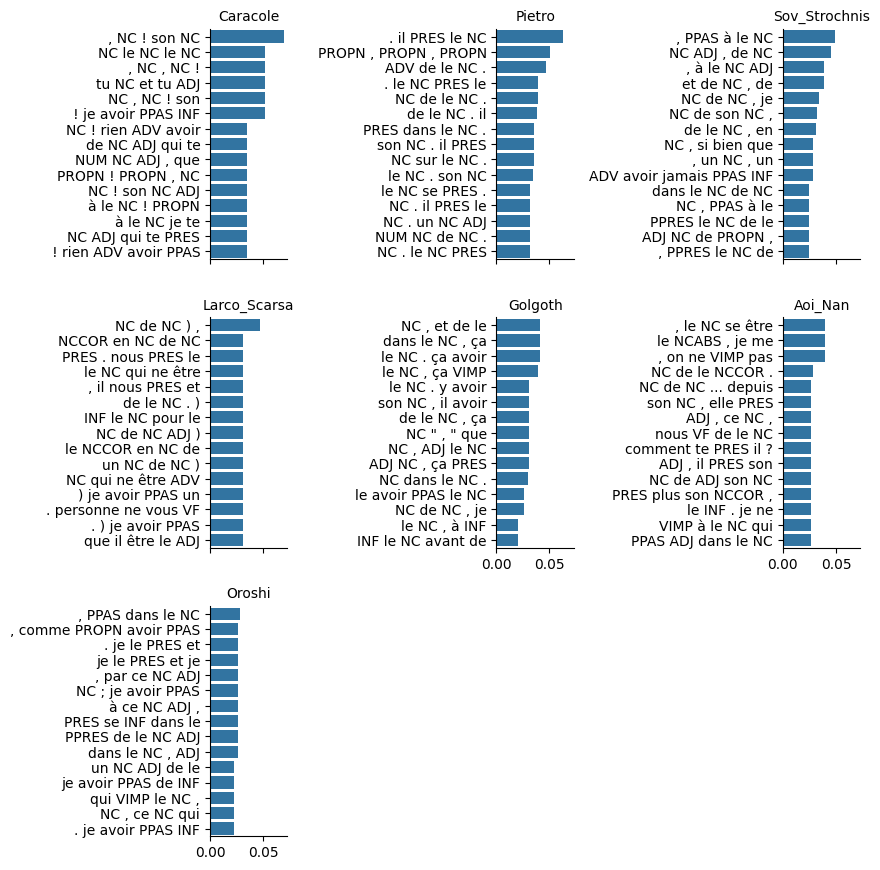

In [17]:
tfidf = pipeline.get_features(feature)
plot_tf_idf(tfidf, n_tokens=15, plot_type="sep")

La présentation du diagramme à barres TF-IDF dans un seul graphique permet de voir si un document contient plus de motifs spécifiques que les autres documents d'un corpus.

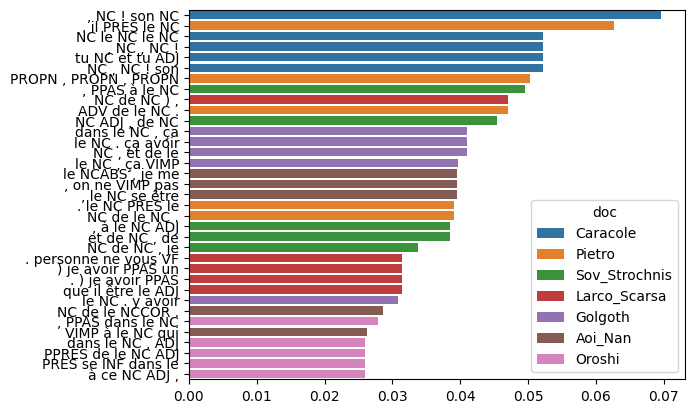

In [18]:
tfidf = pipeline.get_features(feature)
plot_tf_idf(tfidf, n_tokens=5, plot_type="group")

## Principal Component Analysis


L'analyse en composantes principales (ACP) est une technique statistique utilisée pour réduire la dimensionnalité d'un jeu de données tout en conservant le maximum d'information possible. Elle permet de résumer un grand nombre de variables corrélées en un plus petit nombre de nouvelles variables appelées "composantes principales" qui capturent l'essentiel de la variance des données.

- **Composantes principales** : Chaque composante principale est une combinaison linéaire des variables d'origine. Les premières composantes expliquent la majeure partie de la variance des données.
- **Valeurs propres** : Elles indiquent la proportion de la variance expliquée par chaque composante. Les composantes avec les plus grandes valeurs propres sont les plus importantes.
- **Cercle des corrélations** (ou cercle des variables) : Il permet de visualiser l'influence de chaque variable d'origine sur les composantes principales.
- **Diagramme des individus** : Il projette les individus (observations, ici nos motifs) dans le nouvel espace des composantes, révélant des groupements ou des tendances.

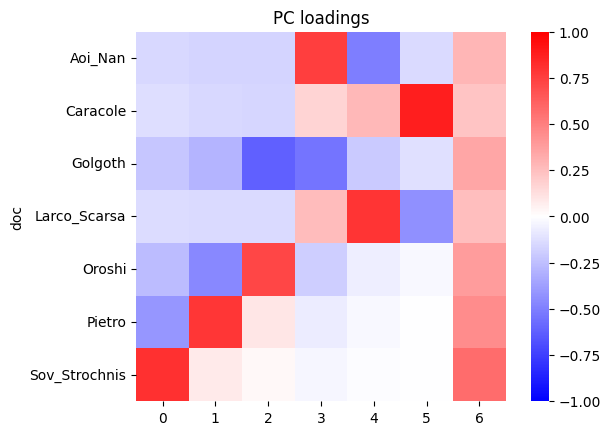

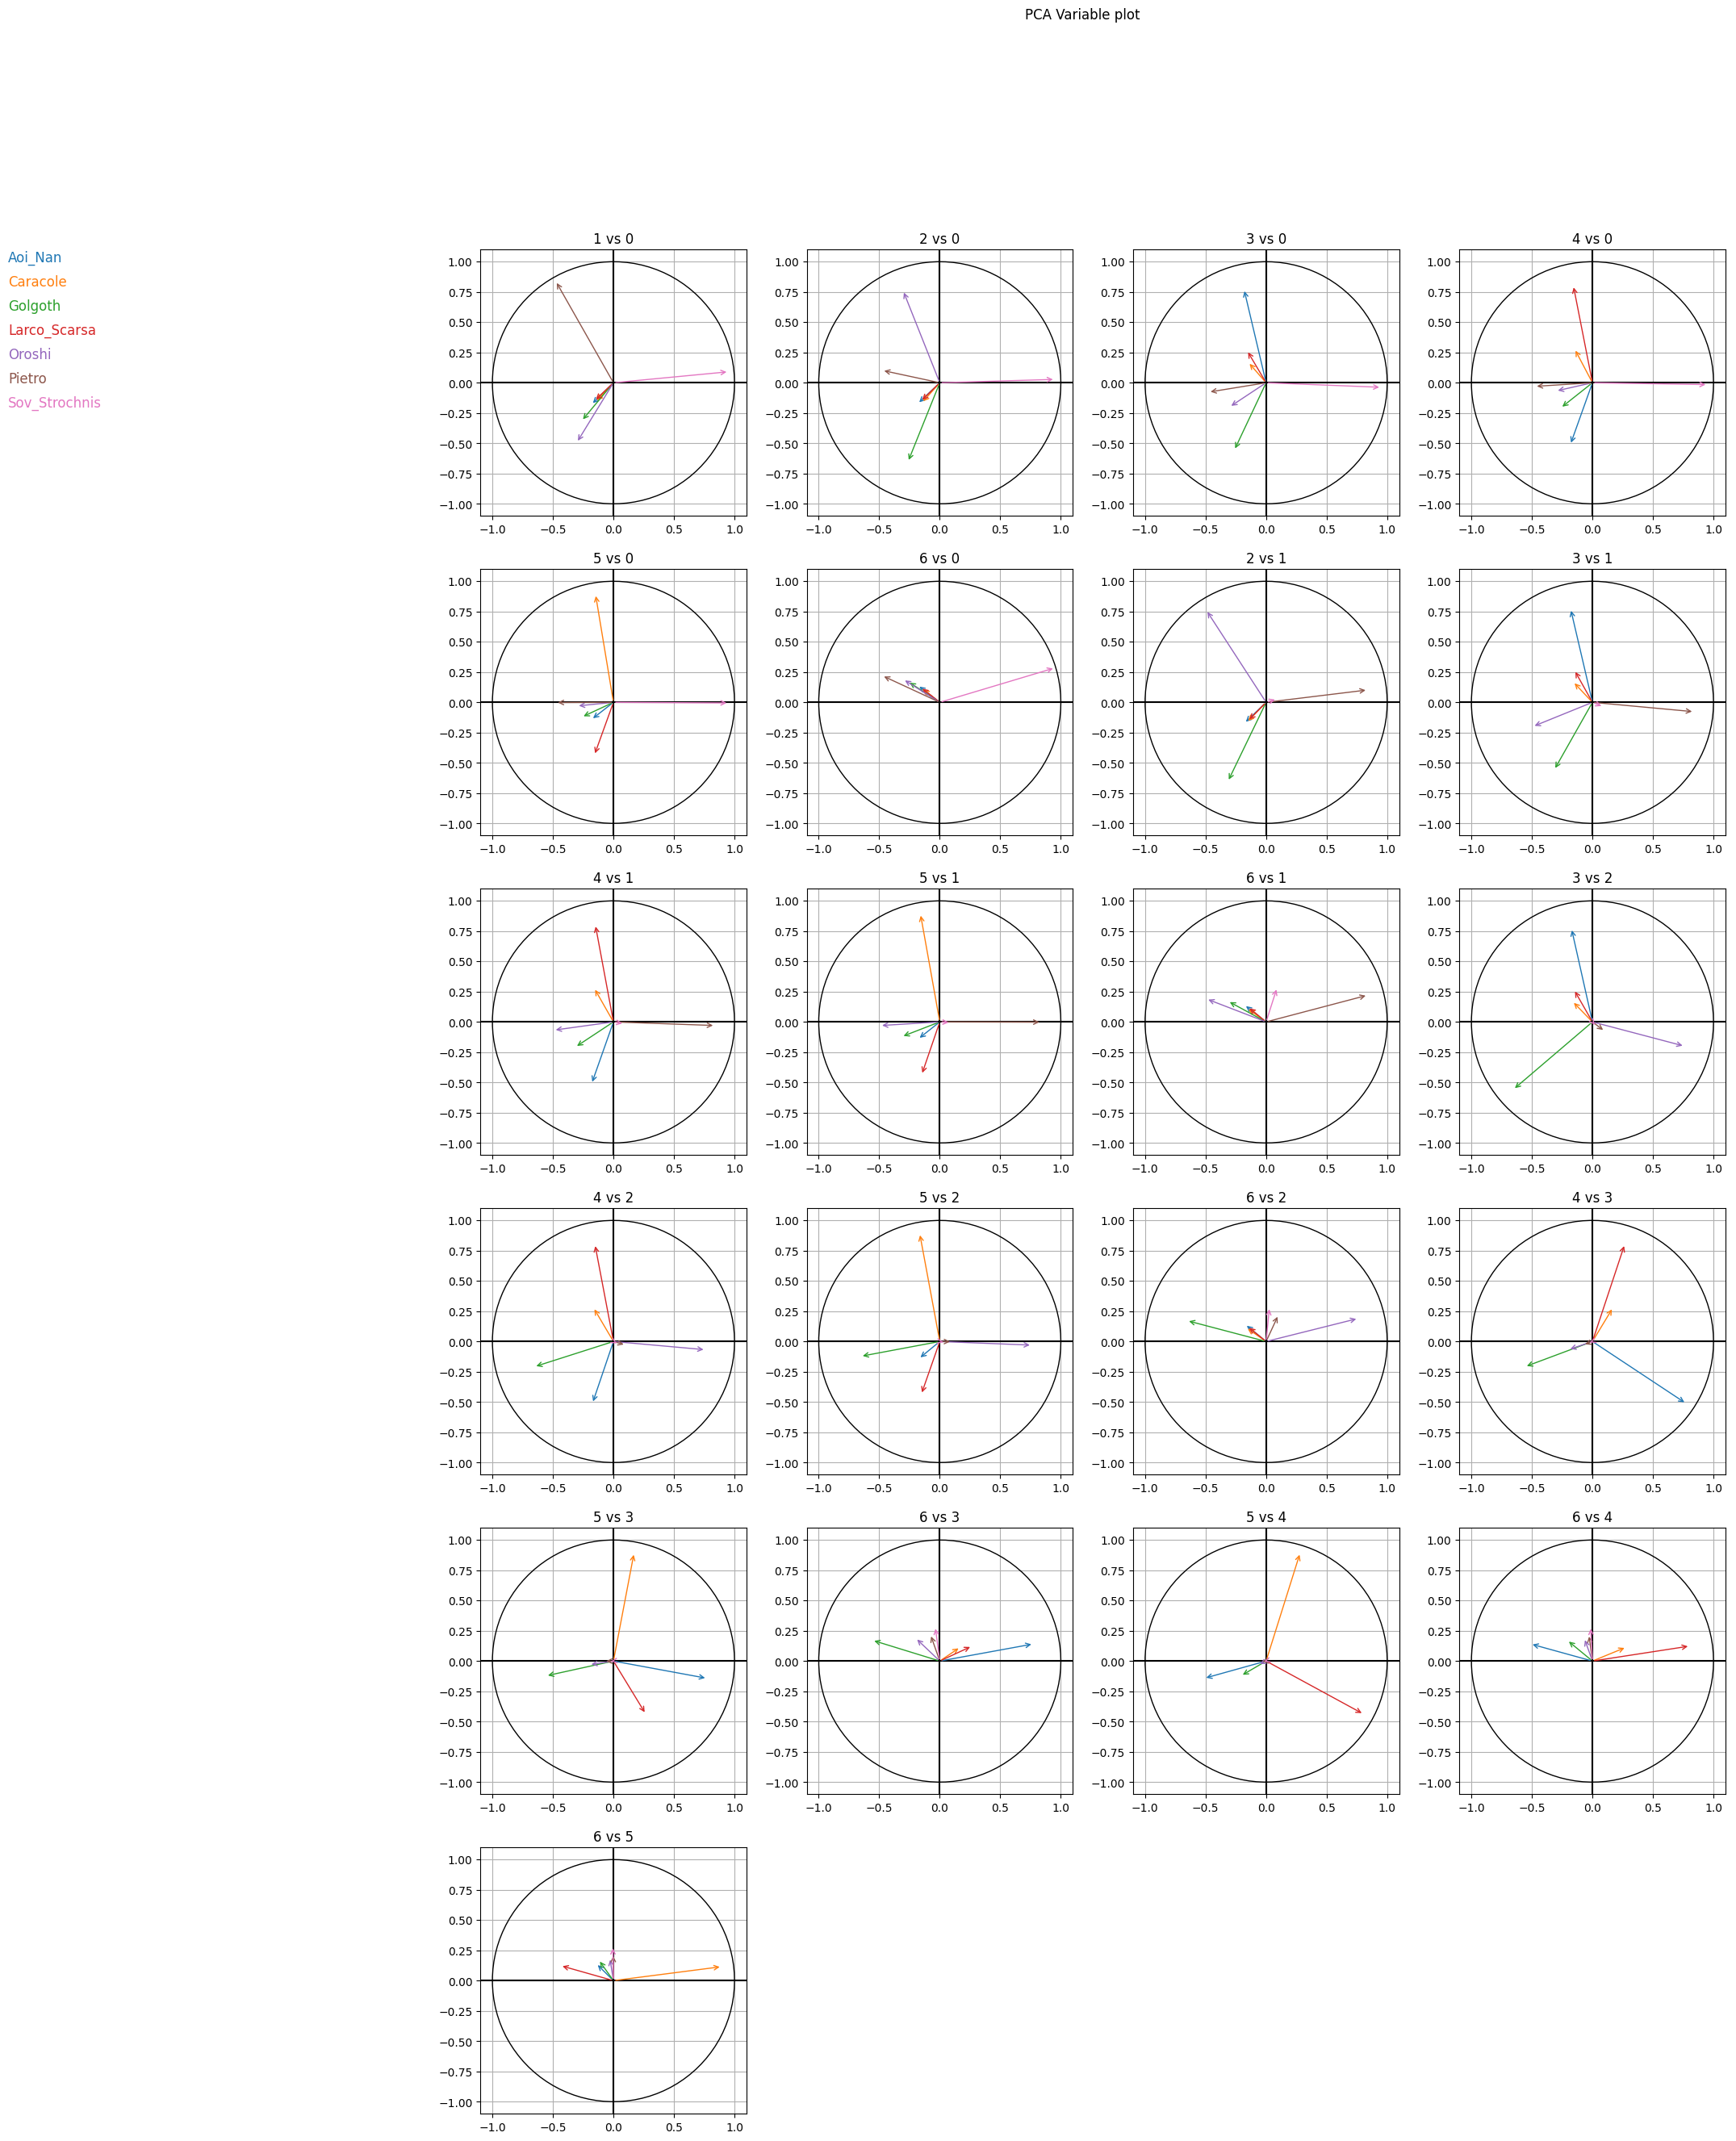

In [19]:
pca = pca_transform(
    tfidf.pivot_table(
        index="token", columns=["doc"], values=feature["name"]
    ), 
    plot=True
)

Les variances expliquées par les différentes composantes sont relativement faibles. Cela tendrait à dire que les données contiennent beaucoup de variabilité répartie sur plusieurs dimensions, et qu'il n'y a pas de composantes principales qui capturent la majorité de l'information. Chaque composante apporte un petit morceau d’explication, ce qui suggère une structure complexe.

Cela peut aussi indiquer que les variables d’origine sont faiblement corrélées entre elles, rendant la réduction de dimension difficile. 

On peut interpréter aussi cela comme une grande indépendance de chacune des narration, chaque voix étant faiblement corrélée entre elles, cela indiquerait que sur ces différentes voix narratives, Damasio a bien réussi son projet de créer un roman polyphonique où chaque voix est bien distinctive par rapport aux autres.

On peut cependant analyser les graphiques : 

- Composante 1 : Sov est opposé aux autres personnages, en particulier Pietro, Oroshi et Golgoth.
- Compostante 2 : Pietro VS Oroshi et Golgoth.
- 3 : Oroshi VS Golgoth.
- 4 : Golgoth VS Aoi.
- Etc. 

## All in one

Nous pouvons également exécuter ces statistiques descriptives, le nombre de mots par document, les fréquences, le tf-idf et l'ACP en un seul appel avec la fonction `execute`.

N.B. : si vous avez beaucoup de documents dans votre corpus, nous ne vous recommandons pas d'utiliser cette fonction car elle ne tracera pas très bien en raison du nombre de documents.

In [20]:
# pipeline.execute(n=n, feature=feature, method="pca", plot=True, stat="proportion", n_tokens=15, plot_type="group")

## Calcul de spécificités

- Se fonde sur les travaux de Pierre Lafon.
- Il teste l'hypothèse d'une distribution aléatoire des tokens entre les segments d'un corpus.
- Il fait la distinction entre les tokens sur-utilisés et sous-utilisés.
- Implémenté par la fonction `build_specificity()`.

Pour aller plus loin, le calcul de la spécificité est fondé sur les travaux de Pierre Lafon ; il vise à « mesurer la fréquence attendue ou exceptionnelle d'un mot (ou d'un motif complexe, d'une caractéristique linguistique, etc.) dans une partie du corpus, par rapport à sa fréquence dans l'ensemble du corpus et à la taille de la partie. [...] Le calcul revient à énumérer toutes les combinaisons possibles de mots dans les différentes parties du corpus, et à évaluer la probabilité de chaque fréquence en fonction de la proportion de fois où elle pourrait théoriquement être rencontrée si toutes les combinaisons étaient également possibles. Le test est donc exact en ce sens qu'il modélise directement et complètement l'hypothèse d'une distribution aléatoire des mots entre les parties ». (voir : https://shs.hal.science/halshs-03763801/file/pincemin_semantique-pur22_181127.pdf ; Lafon, Pierre, 1980, « Sur la variabilité de la fréquence des formes dans un corpus », _MOTS_, n°1, p. 127-165). La fonction `build_specificity` implémente et effectue ce calcul de spécificité.

C'est un calcul utilisé notamment dans des logiciels tels qu'Hyperbase ou TXM. Voir notamment : https://txm.gitpages.huma-num.fr/textometrie/files/documentation/Manuel%20de%20TXM%200.7%20FR.pdf. 

In [21]:
from motifs.features import build_specificity
spec = build_specificity(pipeline.ngrams)

In [22]:
help(build_specificity)

Help on function build_specificity in module motifs.features:

build_specificity(ngrams, u: float = 0.5)
    CF Lafon, P. “Sur la variabilité de la fréquence des formes dans un
    corpus.” Mots, no. 1 (1980): 127-165. http://www.persee.fr/web/revues/home/
    prescript/article/mots_0243-6450_1980_num_1_1_1008
    
    cf: TXM at https://txm.gitpages.huma-num.fr/textometrie/files/documentation
    /Manuel%20de%20TXM%200.7%20FR.pdf
    
    :param ngrams:
    :param u:
    :return:



In [23]:
spec.to_csv('./output/specificites.csv')

On peut maintenant naviguer dans les résultats du calcul et effectuer différentes analyses :

- En sélectionnant un document et en sélectionnant les n spécificités les plus fréquentes du document (niveau du document).
- En sélectionnant les spécificités les plus fréquentes dans le corpus (analyse ascendante), paramétrable avec un seuil de spécificité pour réduire le nombre de résultats.
- En sélectionnant un token (motif, pos, lemme ou mot) et en voyant toutes ses apparitions dans le corpus (analyse descendante).

L'idée est ici de faciliter et de permettre l'interprétation des résultats à tous les niveaux (pas de phénomène de boîte noire) en revenant aux textes. Plus profondément, cela permet de croiser plusieurs approches sur les données, d'inciter à la navigation fine dans les résultats et au retour systématique aux textes, comme lors d'une analyse qualitative en littérature et en stylistique : 

- __Approche inductive__ : on part des données et des différents calculs statistiques pour tenter de faire émerger des motifs stylistiques caractéristiques d'un texte de notre corpus. Lecture distante, "*data-driven*", qui permet cependant de revenir aux textes.
- __Approche déductive__ : on part cette fois-ci des textes eux-mêmes pour modéliser certains motifs identifiés en lecture proche pour voir leur degré de spécificité dans un texte du corpus, pour obtenir instantanément l'ensemble des occurrences de ce motifs dans l'ensemble du corpus ainsi que ses scores de spécificités. Ex : chez Louis-Ferdinand Céline, énormément de structures qui peuvent être modélisées en motifs : les hyperbates, les phéomènes de dislocations, les énumérations, la fragmentation du discours. Voir sur ce point : Silvestre de Sacy, A. (2020). Les écritures de Louis-Ferdinand Céline. Étude stylométrique et stylistique [Zenodo]. https://doi.org/10.5281/zenodo.7104600.

## Retours aux textes

### Au niveau du corpus (bottom-up analysis)

La fonction `return_to_text_from_spec` permet de sélectionner les spécificités les plus élevées dans le corpus et de donner le contexte et les statistiques basées sur les tokens analysés.

__N.B. : les paramètres `min_spec` et `min_freq` sont très importants et doivent être utilisés pour minimiser le nombre de résultats et le temps de calcul si vous travaillez avec un nombre important de textes. Si vous avez besoin de plus d'informations, voyez `help(return_to_text_from_spec`)__

In [24]:
from motifs.utils import return_to_text_from_spec
import time
t1 = time.time()
context = return_to_text_from_spec(pipeline.ngrams, spec, n, context_len=10, min_spec=3, min_freq=3)
t2 = time.time()
print(t2-t1)
context

1.611598014831543


left_context  \
token                                                              
le NC . le NC  sont descendus dans leur puits dont ils ont so...   
le NC . le NC       Puis nous nous relevons . Très vite , c' est   
le NC . le NC  encore à ouvrir les yeux , je discerne avec peine   
le NC . le NC  , flaire enfin un affleurement de roche qui so...   
le NC . le NC  se retourne , il est encore plus impressionnan...   
...                                                          ...   
le NC . le NC   montante de le ciel fut invisible à le niveau de   
le NC . le NC  À peine trois ou quatre bosses par jour pour r...   
le NC . le NC  plus que notre corde . Ça impliquait de désesc...   
le NC . le NC          basculer dans la peur . À l' oreille , je   
le NC . le NC  les proportions oppressantes . Un courant viol...   

                                  text  \
token                                    
le NC . le NC  la trappe . Les abrités   
le NC . le NC    la gadoue . L' argile   
le NC . le NC   le relief . Les boules   
le NC . le NC     le monde . Les crocs   
le NC . le NC   l' ordinaire . La voix   
...                                ...   
le NC . le NC      le sol . Les cocons   
le NC . le NC     la marche . La ligne   
le NC . le NC   la fin . L' autoursier   
le NC . le NC   le sus . La luminosité   
le NC . le NC   le bas . L' autoursier   

                                                   right_context     doc  \
token                                                                      
le NC . le NC  se claquemurent . Et ils prient déjà sans doute ,  Pietro   
le NC . le NC  latéritique n' absorbe rien . Golgoth nous a s...  Pietro   
le NC . le NC  vertes de les spinifex , seules , matérialisen...  Pietro   
le NC . le NC  particulièrement tant ils souffrent , et sans ...  Pietro   
le NC . le NC  d' Oroshi monte à nouveau . Elle est restée pr...  Pietro   
...                                                          ...     ...   
le NC . le NC  devaient aspirer la moindre lueur sur l' herbe...  Pietro   
le NC . le NC  de falaise faisait bien quelques anses . Quelq...  Pietro   
le NC . le NC        était agile , il n' hésita pas . Perché sur  Pietro   
le NC . le NC  devint très forte dans la salle , trente mètre...  Pietro   
le NC . le NC   tenait encore , terrorisé par ce qu' il voyait ,  Pietro   

                    spec   f      t  
token                                
le NC . le NC  15.352530  71  30427  
le NC . le NC  15.352530  71  30427  
le NC . le NC  15.352530  71  30427  
le NC . le NC  15.352530  71  30427  
le NC . le NC  15.352530  71  30427  
...                  ...  ..    ...  
le NC . le NC  -6.932013  42  78474  
le NC . le NC  -6.932013  42  78474  
le NC . le NC  -6.932013  42  78474  
le NC . le NC  -6.932013  42  78474  
le NC . le NC  -6.932013  42  78474  

[6590 rows x 7 columns]

On peut ensuite récupérer ce tableau pour naviguer dedans suivant les textes du corpus d'intérêt, ici les personnages, afin d'essayer d'identifier des motifs qui peuvent nous intéresser. Je dirais que c'est la première étape d'exploration du corpus, qui nous donne des informations directement sur les spécificités les plus hautes, les motifs qui les ont, les textes du corpus qui présentent ces motifs à très forte spécificités.

In [25]:
context.to_csv('./output/spec_corpus_level.csv')

### Articulation de deux fonctions :

Une fois identifiés certains motifs d'intérêt ou certains textes qui présentent de haut taux de spécificités, deux fonctions implémentées dans le pipeline nous permettent de naviguer dans celui-ci et d'interpréter nos résultats : 

- Une fonction de filtre à partir d'un document du corpus. Il est souvent utile de pouvoir filtrer par une des oeuvres de notre corpus qui nous intéresse tout particulièrement afin de voir quels sont les motifs les plus spécifiques de cette oeuvre et comment ils se distinguent par rapport aux autres oeuvres du corpus (dans notre cas, aux autres voix narratives).
- Une fonction de filtre à partir d'un motif d'intérêt identifié. Si vous avez identifié des tokens ou des motifs d'intérêt dans l'analyse et les calculs précédents (tf-idf, spécificités), il peut être utile de pouvoir obtenir le contexte et le score de spécificité dans lequel un token est utilisé. Cela peut être fait grâce à la fonction `return_to_text_from_token`. Vous devez d'abord définir le token d'intérêt que vous voulez analyser, sélectionner le context_length que vous voulez afficher dans le tableau et ensuite exécuter la fonction.

Présentons ici quelques exemples. 

In [37]:
# Show the 20 most specific tokens for Oroshi:
doc = "Oroshi"
oroshi = spec.sort_values(by=[doc, "spec"], ascending=False)
oroshi.head(20)

Aoi_Nan  Caracole   Golgoth  Larco_Scarsa    Oroshi  \
token                                                                           
. je avoir PPAS INF           0.0       0.0  0.000000           0.0  3.189488   
NC , ce NC qui                0.0       0.0  0.000000           0.0  3.189488   
je avoir PPAS de INF          0.0       0.0  0.000000           0.0  3.189488   
. je avoir PPAS INF           0.0       0.0  0.000000           0.0  3.189488   
NC , ce NC qui                0.0       0.0  0.000000           0.0  3.189488   
je avoir PPAS de INF          0.0       0.0  0.000000           0.0  3.189488   
, PPAS dans le NC             0.0       0.0  0.000000           0.0  3.186657   
, PPAS dans le NC             0.0       0.0  0.000000           0.0  3.186657   
NC , le NC VIMP               0.0       0.0  0.633602           0.0  3.061950   
NC , le NC VIMP               0.0       0.0  0.633602           0.0  3.061950   
NC , le NC VIMP               0.0       0.0  0.633602           0.0  3.061950   
NC , le NC VIMP               0.0       0.0  0.633602           0.0  3.061950   
, comme PROPN avoir PPAS      0.0       0.0  0.000000           0.0  2.886568   
, par ce NC ADJ               0.0       0.0  0.000000           0.0  2.886568   
. je le PRES et               0.0       0.0  0.000000           0.0  2.886568   
NC ; je avoir PPAS            0.0       0.0  0.000000           0.0  2.886568   
PPRES de le NC ADJ            0.0       0.0  0.000000           0.0  2.886568   
PRES se INF dans le           0.0       0.0  0.000000           0.0  2.886568   
dans le NC , ADJ              0.0       0.0  0.000000           0.0  2.886568   
je le PRES et je              0.0       0.0  0.000000           0.0  2.886568   

                            Pietro  Sov_Strochnis            doc  f      t  \
token                                                                        
. je avoir PPAS INF      -0.477476       0.000000         Oroshi  4  16818   
NC , ce NC qui            0.000000      -1.544971         Oroshi  4  16818   
je avoir PPAS de INF      0.000000      -1.544971         Oroshi  4  16818   
. je avoir PPAS INF      -0.477476       0.000000         Pietro  1  30427   
NC , ce NC qui            0.000000      -1.544971  Sov_Strochnis  1  78474   
je avoir PPAS de INF      0.000000      -1.544971  Sov_Strochnis  1  78474   
, PPAS dans le NC         0.000000      -0.876370         Oroshi  5  16818   
, PPAS dans le NC         0.000000      -0.876370  Sov_Strochnis  3  78474   
NC , le NC VIMP          -1.145971      -1.781519         Oroshi  6  16818   
NC , le NC VIMP          -1.145971      -1.781519        Golgoth  2  11786   
NC , le NC VIMP          -1.145971      -1.781519         Pietro  1  30427   
NC , le NC VIMP          -1.145971      -1.781519  Sov_Strochnis  3  78474   
, comme PROPN avoir PPAS  0.000000       0.000000         Oroshi  3  16818   
, par ce NC ADJ           0.000000       0.000000         Oroshi  3  16818   
. je le PRES et           0.000000       0.000000         Oroshi  3  16818   
NC ; je avoir PPAS        0.000000       0.000000         Oroshi  3  16818   
PPRES de le NC ADJ        0.000000       0.000000         Oroshi  3  16818   
PRES se INF dans le       0.000000       0.000000         Oroshi  3  16818   
dans le NC , ADJ          0.000000       0.000000         Oroshi  3  16818   
je le PRES et je          0.000000       0.000000         Oroshi  3  16818   

                              spec     rel_f  
token                                         
. je avoir PPAS INF       3.189488  0.000238  
NC , ce NC qui            3.189488  0.000238  
je avoir PPAS de INF      3.189488  0.000238  
. je avoir PPAS INF      -0.477476  0.000033  
NC , ce NC qui           -1.544971  0.000013  
je avoir PPAS de INF     -1.544971  0.000013  
, PPAS dans le NC         3.186657  0.000297  
, PPAS dans le NC        -0.876370  0.000038  
NC , le NC VIMP           3.061950  0.000357  
NC , le N

In [27]:
# Si l'on souhaite sauvegarder par exemple les 500 premiers résultats d'un texte : 
spec.sort_values(by=[doc, "spec"], ascending=False).head(500).to_csv('./output/oroshi_spec.csv')

On peut noter par exemple qu'un des motifs les plus spécifiques du personnage d'Oroshi est ". je avoir PPAS INF". Si le motif nous intéresse, on peut utiliser la fonction de retour au texte à partir d'un motif pour voir toutes les occurrences de celui-ci en contexte.

In [28]:
from motifs.utils import return_to_text_from_token
token = '. je avoir PPAS INF' # on choisit le motif cible d'intérêt
context_len = 10 # le contexte que l'on souhaite voir apparaître
context = return_to_text_from_token(pipeline.ngrams, token, n, context_len)
context

left_context  \
0  les yeux depuis Krafla . Je suis heureux pour eux   
1  , nous n' étions pas prêts mentalement à la subir   
2  , Callirhoé était passée devant la moitié de l...   
3         sache , que je lui dise : il aurait reculé   
4  en une centaine de pas , nous atteignîmes l' E...   

                            text  \
0       . J' aurais aimé réussir   
1       . J' avais beau examiner   
2      . J' avais cru apercevoir   
3        . J' aurais dû prévenir   
4  . J' aurais voulu enregistrer   

                                       right_context     doc  \
0  cela avec Coriolis . Mais " quelque chose ne p...  Pietro   
1  la doline , recalculer ses dimensions , interp...  Oroshi   
2  une résonance de flamme chez Aoi . Pourtant j'...  Oroshi   
3   tout le monde dès le début – avant même Brakauer  Oroshi   
4     les mines de Horst et de Karst , leur bonhomie  Oroshi   

                 token  
0  . je avoir PPAS INF  
1  . je avoir PPAS INF  
2  . je avoir PPAS INF  
3  . je avoir PPAS INF  
4  . je avoir PPAS INF

Interprétation : 

- Motif du regret, du remord ?

Oroshi est un personnage qui incarne une sensibilité très affinée, tant sur le plan émotionnel que spirituel. Son intuition est l’un de ses plus grands atouts : elle perçoit des choses que les autres membres de la Horde ne remarquent pas forcément, que ce soit dans les changements du vent ou les tensions internes du groupe. Oroshi ressent les émotions des autres, mais elle maintient une certaine distance émotionnelle. Son empathie est souvent implicite, et elle aide ses compagnons sans toujours exprimer ses propres sentiments.

Regardons les résultats pour le personnage de Pietro Della Rocca.

In [29]:
# Show the 10 most specific tokens for Pietro:
doc = "Pietro"
pietro = spec.sort_values(by=[doc, "spec"], ascending=False)
pietro.head(20)

Aoi_Nan  Caracole   Golgoth  Larco_Scarsa    Oroshi  \
token                                                                   
le NC . le NC   -1.062777 -0.925776 -2.340648     -1.335580  0.324819   
le NC . le NC   -1.062777 -0.925776 -2.340648     -1.335580  0.324819   
le NC . le NC   -1.062777 -0.925776 -2.340648     -1.335580  0.324819   
le NC . le NC   -1.062777 -0.925776 -2.340648     -1.335580  0.324819   
le NC . le NC   -1.062777 -0.925776 -2.340648     -1.335580  0.324819   
le NC . le NC   -1.062777 -0.925776 -2.340648     -1.335580  0.324819   
le NC . le NC   -1.062777 -0.925776 -2.340648     -1.335580  0.324819   
NC de le NC .   -1.731977  0.000000 -0.834615     -0.622763 -2.209808   
NC de le NC .   -1.731977  0.000000 -0.834615     -0.622763 -2.209808   
NC de le NC .   -1.731977  0.000000 -0.834615     -0.622763 -2.209808   
NC de le NC .   -1.731977  0.000000 -0.834615     -0.622763 -2.209808   
NC de le NC .   -1.731977  0.000000 -0.834615     -0.622763 -2.209808   
NC de le NC .   -1.731977  0.000000 -0.834615     -0.622763 -2.209808   
. il PRES le NC  0.000000  0.000000  0.000000      0.000000  0.000000   
. il PRES le NC  0.000000  0.000000  0.000000      0.000000  0.000000   
NC . le NC PRES -0.473266  0.000000  0.000000      0.000000 -1.103867   
NC . le NC PRES -0.473266  0.000000  0.000000      0.000000 -1.103867   
NC . le NC PRES -0.473266  0.000000  0.000000      0.000000 -1.103867   
NC . le NC PRES -0.473266  0.000000  0.000000      0.000000 -1.103867   
le NC . il PRES -0.580836 -0.306523  0.000000      0.000000 -0.720580   

                    Pietro  Sov_Strochnis            doc   f      t  \
token                                                                 
le NC . le NC    15.352530      -6.932013         Pietro  71  30427   
le NC . le NC    15.352530      -6.932013         Oroshi  16  16818   
le NC . le NC    15.352530      -6.932013       Caracole   2   3977   
le NC . le NC    15.352530      -6.932013        Aoi_Nan   4   7449   
le NC . le NC    15.352530      -6.932013   Larco_Scarsa   2   5218   
le NC . le NC    15.352530      -6.932013        Golgoth   4  11786   
le NC . le NC    15.352530      -6.932013  Sov_Strochnis  42  78474   
NC de le NC .    12.720579      -2.922712         Pietro  81  30427   
NC de le NC .    12.720579      -2.922712   Larco_Scarsa   5   5218   
NC de le NC .    12.720579      -2.922712        Golgoth  11  11786   
NC de le NC .    12.720579      -2.922712        Aoi_Nan   4   7449   
NC de le NC .    12.720579      -2.922712         Oroshi  11  16818   
NC de le NC .    12.720579      -2.922712  Sov_Strochnis  75  78474   
. il PRES le NC  10.135046      -5.253198         Pietro  16  30427   
. il PRES le NC  10.135046      -5.253198  Sov_Strochnis   1  78474   
NC . le NC PRES   9.180867      -5.421475         Pietro  18  30427   
NC . le NC PRES   9.180867      -5.421475        Aoi_Nan   1   7449   
NC . le NC PRES   9.180867      -5.421475         Oroshi   1  16818   
NC . le NC PRES   9.180867      -5.421475  Sov_Strochnis   2  78474   
le NC . il PRES   7.763959      -4.778862         Pietro  19  30427   

                      spec     rel_f  
token                                 
le NC . le NC    15.352530  0.002333  
le NC . le NC     0.324819  0.000951  
le NC . le NC    -0.925776  0.000503  
le NC . le NC    -1.062777  0.000537  
le NC . le NC    -1.335580  0.000383  
le NC . le NC    -2.340648  0.000339  
le NC . le NC    -6.932013  0.000535  
NC de le NC .    12.720579  0.002662  
NC de le NC .    -0.622763  0.000958  
NC de le NC .    -0.834615  0.000933  
NC de le NC .    -1.731977  0.000537  
NC de le NC .    -2.209808  0.000654  
NC de le NC .    -2.922712  0.000956  
. il PRES le NC  10.135046  0.000526  
. il PRES le NC  -5.253198  0.000013  
NC . le NC PRES   9.180867  0.000592  
NC . le NC PRES  -0.473266  0.000134  
NC . le NC PRES  -1.103867  0.000059  
NC . le NC PRES  -5.421475  0.000025  
le NC . il PRES   7.763959  0

In [30]:
token = 'NC . le NC PRES' # on choisit le motif cible d'intérêt
context_len = 10 # le contexte que l'on souhaite voir apparaître
context = return_to_text_from_token(pipeline.ngrams, token, n, context_len)
context

left_context  \
0   , comme si personnellement on venait de le met...   
1               , dos à le vent et plie ses genoux en   
2     sous le vent , afin de maintenir ses hélices en   
3        éclats de rire nous fouetta de le fond de la   
4            jour sans vent et il retire le boo d' un   
5               la sueur . Copeaux de sel , c' est la   
6   Je vois leur sillage écumer dans les vapeurs d...   
7     couplée par une courroie à une hélice , sous le   
8   gouffre . Léarch est déséquilibré . Il tombe d...   
9    s' affaisse , il est impossible de résister à le   
10   , toujours assis en tailleur , baisse la tête et   
11  reste tranchant . Il s' émousse un peu sur cer...   
12  . Une minute plus tard , l' éolicoptère percut...   
13  Scóverr . Une lande rase cintrée entre deux li...   
14  sommes agglutinés à le chevet de Golgoth , nou...   
15  mètres plus haut , le soleil commence à éclabo...   
16        Ni épais , ni liquide . Aucun souffle ne le   
17         bien après . Par bribes . Moins d' œufs de   
18  et toujours , en brassant de les phrases inaud...   
19            un tas de sable si fin qu' il fumait en   
20     contre ... J' entends à peine la voix de notre   
21       séparé , coupé de tout avenir ou passé . Une   

                                        text  \
0             question . Le commodore baisse   
1                     vol . Le flux entraîne   
2                  rotation . La lune brille   
3             salle . Les rires tonitruèrent   
4                       geste . Le sang bave   
5                  stèche . Le slamino pique   
6               brume . Le brouillard flotte   
7             flotteur . Le flotteur remonte   
8                vide . Le fauconnier dérape   
9                      vent . Le vent décide   
10                   prie . Le disque tourne   
11                couplets . Le stylite fait   
12             ballair . Les pales coupèrent   
13             crêtes . L' altitude explique   
14                 gênons . Le verdict tombe   
15                paroi . Le crivetz demeure   
16          trouble . La réverbération brûle   
17         lumière . Les volumes grossissent   
18          mi-voix . Le fauconnier rappelle   
19                 coulant . Le ressac vient   
20  combattant-protecteur . La cascade rugit   
21                 stase . Le verre conserve   

                                        right_context            doc  \
0      les yeux . Il hésite quelque peu à enchaîner ,         Pietro   
1      les hélices . Elles lui serviront à la fois de         Pietro   
2      et s' éteint , selon les nuages . Les bombairs         Pietro   
3              de plus belle . Mais ce qui se passa à         Pietro   
4        entre les dents de le mousse et coule sur la         Pietro   
5                  un peu la peau , à le pire . Voilà         Pietro   
6    dans un halo surnaturel . Les peaux , la surface         Pietro   
7          ainsi la houle . Tout seul ! Ça soulage l'         Pietro   
8        mais il s' accroche de le poing à son faucon         Pietro   
9              pour toi : il te gifle à tue-tête , il         Pietro   
10  doucement sur lui-même . La nuit est maintenan...         Pietro   
11  moins mauvaise figure avec de les vers préparé...         Pietro   
12  les attaches de la nacelle . Elles tranchèrent...         Pietro   
13    la fraîcheur de l' air . On aperçoit partout de         Pietro   
14     : La tente a été dressée , arrimée et pitonnée         Pietro   
15            faible . Mais il est glacé . " Tant que         Pietro   
16     la rétine . Erg Machaon tira sur Erg Machaon .         Pietro   
17  . Golgoth appelle ça de les tortues . Demi-sph...         Pietro   
18             ses faucons à le poing , il a dû avoir         Oroshi   
19  de commencer . Un silence suspendu , très apai...        Aoi_Nan   
20  devant moi , une chute torrentielle , vertigin...  Sov_Strochnis   
21           mais il ne se souvient pas 

Interprétation ? Il ne faut pas hésiter à naviguer dans les motifs. Au fil du temps, on identifie assez rapidement ceux qui sont assez classiques et ceux qui preuvent relever d'une figure stylistique. Le calcul de spécificité nous aide pour cela en nous donnant des scores différentiels au sein du corpus, il ne faut jamais oublier cela.

Golgoth : 

In [31]:
# Show the 10 most specific tokens for Golgoth:
doc = "Golgoth"
golgoth = spec.sort_values(by=[doc, "spec"], ascending=False)
golgoth.head(20)

Aoi_Nan  Caracole   Golgoth  Larco_Scarsa    Oroshi  \
token                                                                    
le NC , ça VIMP   0.000000  0.000000  5.884281      0.669168  0.000000   
le NC , ça VIMP   0.000000  0.000000  5.884281      0.669168  0.000000   
à INF de le NC    0.000000  0.344995  5.513609      0.000000 -1.154046   
à INF de le NC    0.000000  0.344995  5.513609      0.000000 -1.154046   
à INF de le NC    0.000000  0.344995  5.513609      0.000000 -1.154046   
à INF de le NC    0.000000  0.344995  5.513609      0.000000 -1.154046   
à INF de le NC    0.000000  0.344995  5.513609      0.000000 -1.154046   
, à INF de le     0.000000  0.569859  5.067929      0.470434 -0.602088   
, à INF de le     0.000000  0.569859  5.067929      0.470434 -0.602088   
, à INF de le     0.000000  0.569859  5.067929      0.470434 -0.602088   
, à INF de le     0.000000  0.569859  5.067929      0.470434 -0.602088   
, à INF de le     0.000000  0.569859  5.067929      0.470434 -0.602088   
le NC dans le NC -0.364684  0.000000  4.660692      0.417654 -1.956969   
le NC dans le NC -0.364684  0.000000  4.660692      0.417654 -1.956969   
le NC dans le NC -0.364684  0.000000  4.660692      0.417654 -1.956969   
le NC dans le NC -0.364684  0.000000  4.660692      0.417654 -1.956969   
le NC dans le NC -0.364684  0.000000  4.660692      0.417654 -1.956969   
le NC dans le NC -0.364684  0.000000  4.660692      0.417654 -1.956969   
NC , et de le     0.000000  0.000000  4.466501      0.000000  0.000000   
dans le NC , ça   0.000000  0.000000  4.466501      0.000000  0.000000   

                    Pietro  Sov_Strochnis            doc   f      t      spec  \
token                                                                           
le NC , ça VIMP   0.000000       0.000000        Golgoth   6  11786  5.884281   
le NC , ça VIMP   0.000000       0.000000   Larco_Scarsa   1   5218  0.669168   
à INF de le NC    0.312845      -2.383840        Golgoth  10  11786  5.513609   
à INF de le NC    0.312845      -2.383840       Caracole   1   3977  0.344995   
à INF de le NC    0.312845      -2.383840         Pietro   5  30427  0.312845   
à INF de le NC    0.312845      -2.383840         Oroshi   1  16818 -1.154046   
à INF de le NC    0.312845      -2.383840  Sov_Strochnis   6  78474 -2.383840   
, à INF de le     0.000000      -2.579470        Golgoth   7  11786  5.067929   
, à INF de le     0.000000      -2.579470       Caracole   1   3977  0.569859   
, à INF de le     0.000000      -2.579470   Larco_Scarsa   1   5218  0.470434   
, à INF de le     0.000000      -2.579470         Oroshi   1  16818 -0.602088   
, à INF de le     0.000000      -2.579470  Sov_Strochnis   2  78474 -2.579470   
le NC dans le NC -0.485739      -1.369803        Golgoth  12  11786  4.660692   
le NC dans le NC -0.485739      -1.369803   Larco_Scarsa   2   5218  0.417654   
le NC dans le NC -0.485739      -1.369803        Aoi_Nan   2   7449 -0.364684   
le NC dans le NC -0.485739      -1.369803         Pietro   7  30427 -0.485739   
le NC dans le NC -0.485739      -1.369803  Sov_Strochnis  15  78474 -1.369803   
le NC dans le NC -0.485739      -1.369803         Oroshi   1  16818 -1.956969   
NC , et de le     0.000000       0.000000        Golgoth   4  11786  4.466501   
dans le NC , ça   0.000000       0.000000        Golgoth   4  11786  4.466501   

                     rel_f  
token                       
le NC , ça VIMP   0.000509  
le NC , ça VIMP   0.000192  
à INF de le NC    0.000848  
à INF de le NC    0.000251  
à INF de le NC    0.000164  
à INF de le NC    0.000059  
à INF de le NC    0.000076  
, à INF de le     0.000594  
, à INF de le     0.000251  
, à INF de le     0.000192  
, à INF de le     0.000059  
, à INF de le     0.000025  
le NC dans le NC  0.001018  
le NC dans le NC  0.000383  
le NC dans le NC  0.000268  
le NC dans le NC  0.000230  
le NC dans le NC  0.000191  
le NC dans le NC  0.000059  
NC , et de le     0.000339 

In [32]:
token = 'le NC , ça VIMP' # on choisit le motif cible d'intérêt
context_len = 10 # le contexte que l'on souhaite voir apparaître
context = return_to_text_from_token(pipeline.ngrams, token, n, context_len)
context

left_context  \
0        lui suis rentré dedans . À le schnee . Dans   
1  les tablées , les légumes en tambouille , et r...   
2  partout peinte à les lèvres , de les trouvères...   
3  dit qu' ils trouvaient l' ouverture dans le li...   
4  mioches joufflus qui se couraient après en ron...   
5        . Les faucons , ça nous levait la tête dans   
6      et de brique , les rues labourées de canaux à   

                          text  \
0      la ruelle , ça picorait   
1    les tonneaux , ça gerbait   
2      les plats , ça beuglait   
3       le vent , ça balançait   
4      le silence , ça faisait   
5         le ciel , ça faisait   
6  la sauvage , ça ressemblait   

                                       right_context           doc  \
0               à le bec dans les joues . À y foutre       Golgoth   
1      dans les écuelles – même Ergo se lâchait , c'       Golgoth   
2       bon enfant , j' étais pas le dernier à tâter       Golgoth   
3          comme de l' espoir – Darbon , ça puait la       Golgoth   
4     bizarre , funèbre on dit , hein , mortellien .       Golgoth   
5       beau à les voir et Darbon il avait la classe       Golgoth   
6  à un baraquement hâtif oublié par de les Obliq...  Larco_Scarsa   

             token  
0  le NC , ça VIMP  
1  le NC , ça VIMP  
2  le NC , ça VIMP  
3  le NC , ça VIMP  
4  le NC , ça VIMP  
5  le NC , ça VIMP  
6  le NC , ça VIMP

- Idiolecte, discours argotique.

In [33]:
token = ', à INF de le' # on choisit le motif cible d'intérêt
context_len = 10 # le contexte que l'on souhaite voir apparaître
context = return_to_text_from_token(pipeline.ngrams, token, n, context_len)
context

left_context                 text  \
0      la cognée . Ça a soulevé rageur dans la traîne     , à poncer de la   
1             , à poncer de la hanche et de l' épaule   , à corroyer de le   
2         ? Que fout Pietro ? Il donne dans le social    , à serrer de les   
3        un bol de soupe , caffi de feuilles de saule  , à dégueuler de le   
4          de les créneaux , à vivre à même le fleuve   , à touiller de le   
5       pas le dernier à tâter les croupes à la volée    , à toucher de la   
6   dessus ... Ça a crissé salement de le crampon ...   , à essorer de les   
7      plus ; ils étaient très près de nous à présent     , à faire de les   
8     juste derrière " eau " , en arrosant les autres   , à discuter de le   
9         , ni faim , ni fatigue . Elle était là-haut    , à battre de les   
10   à flotter au-dessus de le cirque , empli d' elle     , à faire de les   
11  les ailes et les écoufles , à gonfler les gonf...     , à jeter de les   

                                        right_context            doc  \
0           hanche et de l' épaule , à corroyer de le        Golgoth   
1   plastron ... Faut dire qu' ils ont tellement l...        Golgoth   
2    pognes à les vieilles , à faire dans le princier        Golgoth   
3          vert par les naseaux toute la nuit ! Et ça        Golgoth   
4   grain comme ils peuvent dans leurs tamis , de les        Golgoth   
5   touffe pas vraiment farouche , à rigoler quoi ...        Golgoth   
6       miches , puis tout le Bloc a basculé avec moi        Golgoth   
7       huit à niveau de la crête et une joie immense         Oroshi   
8        sens de le proverbe , à dire n' importe quoi  Sov_Strochnis   
9       ailes , plier , ferler , battre – propulser –  Sov_Strochnis   
10  figures connes de gonfalon , à rire tout dedans ,   Larco_Scarsa   
11           boos à tous crins , n' importe où , dans       Caracole   

            token  
0   , à INF de le  
1   , à INF de le  
2   , à INF de le  
3   , à INF de le  
4   , à INF de le  
5   , à INF de le  
6   , à INF de le  
7   , à INF de le  
8   , à INF de le  
9   , à INF de le  
10  , à INF de le  
11  , à INF de le

- Discours argotique...

In [34]:
# Pour sauvegarder la table des résultats : 
context[context["doc"] == "Golgoth"].to_csv('./output/Golgoth_motifs.csv')

On peut se fonder sur nos calculs statistiques précédents également, comme le tf-idf : par exemple, sur le personnage de Sov : 

In [42]:
from motifs.utils import return_to_text_from_token
token = 'ADV avoir jamais PPAS INF'
context_len = 9
context = return_to_text_from_token(pipeline.ngrams, token, n, context_len)
context

left_context  \
0          C' est la confiance . La confiance que je   
1            un vieux racleur , j' ai compris que je   
2   Il avait glissé accidentellement de la tour . Je   
3  notre vie à aller quérir une origine que personne   
4  crachait le véhicule . Contrairement à Pietro ...   
5        particulière , il ne nous rassura pas . Erg   
6   ? Je me sentais dérisoire devant cette fille qui   
7      découvrait qu' il savait de les choses qu' il   
8                    deux fois , mais il le fit . Je   
9                 demande rien . Je ne sais pas . Je   

                               text  \
0           n' ai jamais su trouver   
1        n' avais jamais su contrer   
2           n' ai jamais pu oublier   
3          n' a jamais pu atteindre   
4      n' avais jamais vu combattre   
5         n' avait jamais su mentir   
6          n' avait jamais dû faire   
7        n' aurait jamais dû savoir   
8  n' aurais jamais imaginé pouvoir   
9          n' ai jamais su répondre   

                                      right_context            doc  \
0        . Celle qui se dégage de le combattant qui    Erg_Machaon   
1                  . " Il y a pourtant parmi eux de         Talweg   
2                 ma lâcheté . Le bras que je n' ai  Sov_Strochnis   
3  ? Parce que nous pensons justement y parvenir n'  Sov_Strochnis   
4        un maître foudre , et ce que je découvrais  Sov_Strochnis   
5              – à les autres d' abord , à lui-même  Sov_Strochnis   
6           trois pas de suite sous stèche 8 , mais  Sov_Strochnis   
7                  – vu son statut . Moi , j' étais  Sov_Strochnis   
8    me lever un matin sans voir Karst piocher dans  Sov_Strochnis   
9               à cette question , ni à huit ans ni  Sov_Strochnis   

                       token  
0  ADV avoir jamais PPAS INF  
1  ADV avoir jamais PPAS INF  
2  ADV avoir jamais PPAS INF  
3  ADV avoir jamais PPAS INF  
4  ADV avoir jamais PPAS INF  
5  ADV avoir jamais PPAS INF  
6  ADV avoir jamais PPAS INF  
7  ADV avoir jamais PPAS INF  
8  ADV avoir jamais PPAS INF  
9  ADV avoir jamais PPAS INF

In [43]:
token = 'le NC . y avoir'
context_len = 9
context = return_to_text_from_token(pipeline.ngrams, token, n, context_len)
context

left_context                  text  \
0  âge , j' apprenais debout , un ventilo dans  la tronche . Y avait   
1   demie plus tard , je m' en mords gravement         le cuir . Y a   
2        l' autre , y doit plus être trop loin  le bougrasseau . Y a   

                                right_context      doc            token  
0    pas de jouets , de coussins , de dessins  Golgoth  le NC . y avoir  
1     un gars , costaud , trapu comme gorce ,  Golgoth  le NC . y avoir  
2  juste à remuer la queue et à galoper droit  Golgoth  le NC . y avoir

In [60]:
token = 'tu NC et tu ADJ'
context_len = 8
context = return_to_text_from_token(pipeline.ngrams, token, n, context_len)
context

left_context  \
0          fourbis mes lames Et déjà tu bafouilles ,   
1          carafe Plus de son dans le carillon Alors   
2  mascarade désincarnée D' un pâle briscard inca...   

                          text  \
0   tu cafouilles Et tu blâmes   
1  tu cafouilles et tu piaffes   
2    Tu caresses et tu câlines   

                                    right_context       doc            token  
0  ... Foutaises ! Fourbe foutraque , Tes laisses  Caracole  tu NC et tu ADJ  
1               Caribou bèle qui veut de le son !  Caracole  tu NC et tu ADJ  
2  Tu caramélises les sons Tu carambouilles et tu  Caracole  tu NC et tu ADJ

In [58]:
# Show the 20 most specific tokens for Caracole:

def return_to_text_from_doc(doc, nb_token_to_display):
    doc = doc
    filter_spec = spec.sort_values(by=[doc, "spec"], ascending=False)
    return filter_spec.head(nb_token_to_display)

return_to_text_from_doc(doc='Caracole', nb_token_to_display=20)

Aoi_Nan  Caracole  Golgoth  Larco_Scarsa  Oroshi  \
token                                                                      
, NC ! son NC          0.000000  6.354179      0.0           0.0     0.0   
! je avoir PPAS INF    0.000000  4.765475      0.0           0.0     0.0   
, NC , NC !            0.000000  4.765475      0.0           0.0     0.0   
NC , NC ! son          0.000000  4.765475      0.0           0.0     0.0   
NC le NC le NC         0.000000  4.765475      0.0           0.0     0.0   
tu NC et tu ADJ        0.000000  4.765475      0.0           0.0     0.0   
NC , un NC à           0.000000  4.171894      0.0           0.0     0.0   
le NC le NC le         0.000000  4.171894      0.0           0.0     0.0   
le NC le NC le         0.000000  4.171894      0.0           0.0     0.0   
NC , un NC à           0.000000  4.171894      0.0           0.0     0.0   
de le NC , et          1.674213  3.782423      0.0           0.0     0.0   
de le NC , et          1.674213  3.782423      0.0           0.0     0.0   
! rien ADV avoir PPAS  0.000000  3.176877      0.0           0.0     0.0   
, par NC de NUM        0.000000  3.176877      0.0           0.0     0.0   
NC ! rien ADV avoir    0.000000  3.176877      0.0           0.0     0.0   
NC ! son NC ADJ        0.000000  3.176877      0.0           0.0     0.0   
NC , NC , PROPN        0.000000  3.176877      0.0           0.0     0.0   
NC ... son NC ...      0.000000  3.176877      0.0           0.0     0.0   
NC ADJ qui te PRES     0.000000  3.176877      0.0           0.0     0.0   
NUM NC ADJ , que       0.000000  3.176877      0.0           0.0     0.0   

                         Pietro  Sov_Strochnis            doc  f      t  \
token                                                                     
, NC ! son NC          0.000000       0.000000       Caracole  4   3977   
! je avoir PPAS INF    0.000000       0.000000       Caracole  3   3977   
, NC , NC !            0.000000       0.000000       Caracole  3   3977   
NC , NC ! son          0.000000       0.000000       Caracole  3   3977   
NC le NC le NC         0.000000       0.000000       Caracole  3   3977   
tu NC et tu ADJ        0.000000       0.000000       Caracole  3   3977   
NC , un NC à           0.000000      -1.235971       Caracole  3   3977   
le NC le NC le        -0.381979       0.000000       Caracole  3   3977   
le NC le NC le        -0.381979       0.000000         Pietro  1  30427   
NC , un NC à           0.000000      -1.235971  Sov_Strochnis  1  78474   
de le NC , et          0.000000       0.000000       Caracole  3   3977   
de le NC , et          0.000000       0.000000        Aoi_Nan  2   7449   
! rien ADV avoir PPAS  0.000000       0.000000       Caracole  2   3977   
, par NC de NUM        0.000000       0.000000       Caracole  2   3977   
NC ! rien ADV avoir    0.000000       0.000000       Caracole  2   3977   
NC ! son NC ADJ        0.000000       0.000000       Caracole  2   3977   
NC , NC , PROPN        0.000000       0.000000       Caracole  2   3977   
NC ... son NC ...      0.000000       0.000000       Caracole  2   3977   
NC ADJ qui te PRES     0.000000       0.000000       Caracole  2   3977   
NUM NC ADJ , que       0.000000       0.000000       Caracole  2   3977   

                           spec     rel_f  
token                                      
, NC ! son NC          6.354179  0.001006  
! je avoir PPAS INF    4.765475  0.000754  
, NC , NC !            4.765475  0.000754  
NC , NC ! son          4.765475  0.000754  
NC le NC le NC         4.765475  0.000754  
tu NC et tu ADJ        4.765475  0.000754  
NC , un NC à           4.171894  0.000754  
le NC le NC le         4.171894  0.000754  
le NC le NC le        -0.381979  0.000033  
NC , un NC à          -1.235971  0.000013  
de le NC , et          3.782423  0.000754  
de le NC , et          1.674213  0.000268  
! rien ADV avoir PPAS  3.176877  0.000503  
, par NC de NUM        3.176877  0.00050

In [62]:
return_to_text_from_token(pipeline.ngrams, 
                          token='NC , NC ! son', 
                          n=5, 
                          context_len=9)

left_context                   text  \
0               Élu , ça ! Je trace l' écart ,     éjacule , ha ! Mon   
1  , rocs dont sont forclos nos donjons ! Fort  trognon , bosco ! Vos   
2     Stop ! Ton pognon corrompt ! Dors donc ,       hop , dodo ! Ton   

                                  right_context       doc          token  
0             nom ... Mon nom ... Mon nom ... Ô  Caracole  NC , NC ! son  
1  propos rodomonts font corps , font bloc . L'  Caracole  NC , NC ! son  
2   polochon coton , vos cocons , vos ronrons ,  Caracole  NC , NC ! son

In [63]:
return_to_text_from_token(pipeline.ngrams, 
                          token='le NC le NC le', 
                          n=5, 
                          context_len=9)

left_context                     text  \
0  nourrissent . Les nids s' attirent d' ailleurs à  l' évidence les uns les   
1                 ton tour – et roque ! Car Carac a    la faconde Le flot le   
2               – et roque ! Car Carac a la faconde       Le flot le flux l'   
3            roque ! Car Carac a la faconde Le flot       le flux l' onde La   

                               right_context       doc           token  
0   autres . Ils forment de les grappes , s'    Pietro  le NC le NC le  
1   flux l' onde La verve virtuose Qui tue ,  Caracole  le NC le NC le  
2  onde La verve virtuose Qui tue , qui flue  Caracole  le NC le NC le  
3    verve virtuose Qui tue , qui flue , qui  Caracole  le NC le NC le

In [64]:
return_to_text_from_token(pipeline.ngrams, 
                          token='tu NC et tu ADJ', 
                          n=5, 
                          context_len=9)



left_context  \
0       Je fourbis mes lames Et déjà tu bafouilles ,   
1       la carafe Plus de son dans le carillon Alors   
2  La mascarade désincarnée D' un pâle briscard i...   

                          text  \
0   tu cafouilles Et tu blâmes   
1  tu cafouilles et tu piaffes   
2    Tu caresses et tu câlines   

                                       right_context       doc  \
0  ... Foutaises ! Fourbe foutraque , Tes laisses...  Caracole   
1            Caribou bèle qui veut de le son ! Alors  Caracole   
2  Tu caramélises les sons Tu carambouilles et tu...  Caracole   

             token  
0  tu NC et tu ADJ  
1  tu NC et tu ADJ  
2  tu NC et tu ADJ

## Exercice potentiel : 

- Manipuler les fonctionnalités de retours aux textes pour tenter d'identifier des structures linguistiques caractéristiques d'un personnage en se fondant sur les scores de spécificités, les scores tf-idf.
- Essayer par exemple de faire varier la longueur de la séquence (du n-gram) en faisant tourner le notebook depuis le début et en changeant le paramètre de longueur de la séquence.
- Si vous le souhaitez, vous pouvez essayer de lancer le notebook sur un autre corpus de votre choix, même d'une discipline différente : ex : discours politiques, corpus historique, sociologique, psychologique, etc. __NPO :__ 
    - Le corpus doit être en Français.
    - Il faudra changer les paramètres d'entrée au début du notebook pour faire l'annotation du corpus.